# CS559 Machine Learning: Fundamentals and Applications Spring 2023 HW#2


##   Question 1: Linear Regression with l_2 regularization [80 pts]
In this question, students will implement the ridge (l_2) regularized regression model to predict the real estate cost.  Students must use only NumPy, Stat, Pandas, and Matplotlib in this question
 

### a)	[25 pts] Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 70% and 30% for the training and testing datasets. Please provide an explanation of the performance. Students can make visualizations if necessary. 

#### eda 

In [195]:
# all imports
import numpy as np
np.random.seed(12)
import matplotlib.pyplot as plt
import pandas as pd



In [196]:
# load the data 
df_real_estate = pd.read_csv("Real estate.csv",header=0)


In [197]:
df_real_estate.shape


(414, 8)

In [198]:
df_real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [199]:
df_real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [200]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


we noticed that date is as float and we can convert that to int for easier manipulation
same with house age as well 

In [201]:
df_real_estate['X1 transaction date'] = (df_real_estate['X1 transaction date'].astype(int))
df_real_estate['X2 house age'] = (df_real_estate['X2 house age'].astype(int))

df_real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013,13,4082.01500,0,24.94155,121.50381,15.4
410,411,2012,5,90.45606,9,24.97433,121.54310,50.0
411,412,2013,18,390.96960,7,24.97923,121.53986,40.6
412,413,2013,8,104.81010,5,24.96674,121.54067,52.5


In [202]:
print(df_real_estate.duplicated().sum() )

0


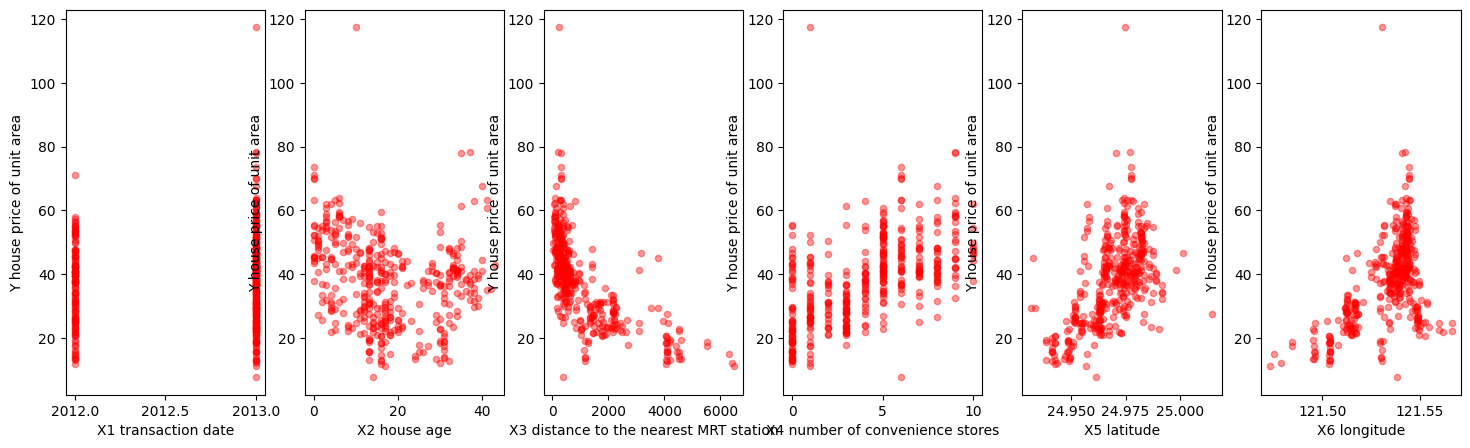

In [203]:
#to help identify categorical variables create subplots of the features against the price
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,5))

for xcol, ax in zip(df_real_estate[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']], axes):
    df_real_estate.plot(kind='scatter', x=xcol, y='Y house price of unit area', ax=ax, alpha=0.4, color='r')

there are no categorial data present as such ( transaction date is a possibility but that will depend on the correlation matrix values )

In [204]:
#checking the distribution
print('Median House Age: ', df_real_estate['X2 house age'].median())
print('Median Price Per Square Foot: $', df_real_estate['Y house price of unit area'].median())

Median House Age:  16.0
Median Price Per Square Foot: $ 38.45


                                              No  X1 transaction date  \
No                                      1.000000             0.007379   
X1 transaction date                     0.007379             1.000000   
X2 house age                           -0.032705             0.050003   
X3 distance to the nearest MRT station -0.013573             0.016519   
X4 number of convenience stores        -0.012699            -0.005586   
X5 latitude                            -0.010110             0.008118   
X6 longitude                           -0.011059             0.013177   
Y house price of unit area             -0.028587             0.081545   

                                        X2 house age  \
No                                         -0.032705   
X1 transaction date                         0.050003   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.024801   
X4 number of convenience stores             0.048855   
X5 lat

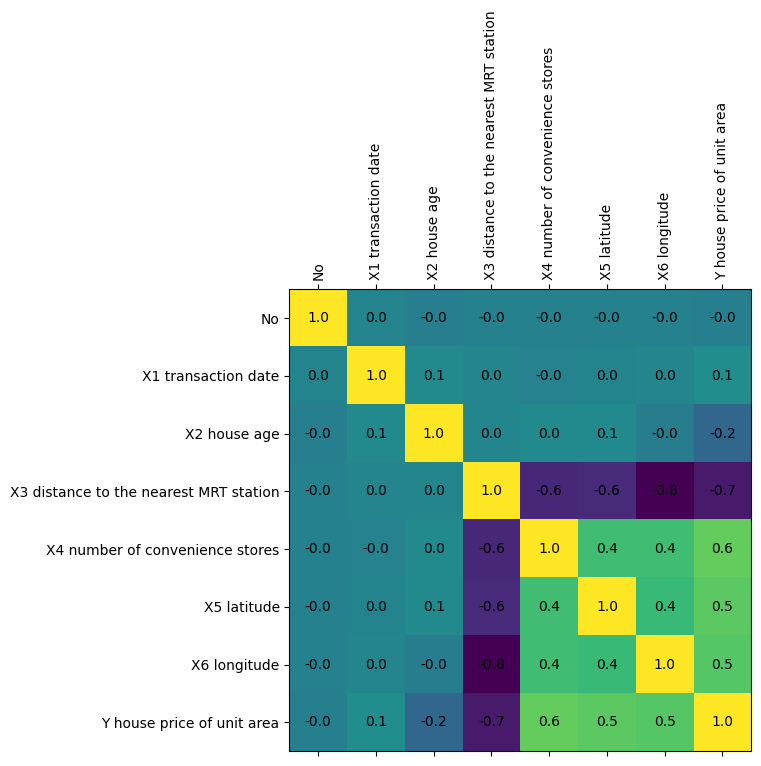

In [205]:
# correlation matrix
corr_matrix = df_real_estate.corr()
print(corr_matrix)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(corr_matrix)
for (i, j), z in np.ndenumerate(corr_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


here we can see that as the number of convenience stores or latitude or longitutde increases, the house price of unit area may also tend to increase.

In [206]:

# Shuffle dataframe using sample function so we get a random sample for training and testing
df_real_estate = df_real_estate.sample(frac=1)
df_real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
407,408,2013,5,2408.99300,0,24.95505,121.55964,22.3
275,276,2012,1,23.38284,7,24.96772,121.54102,49.7
210,211,2013,5,390.56840,5,24.97937,121.54245,52.2
6,7,2012,34,623.47310,7,24.97933,121.53642,40.3
392,393,2013,42,443.80200,6,24.97927,121.53874,35.3
...,...,...,...,...,...,...,...,...
241,242,2013,13,250.63100,7,24.96606,121.54297,41.4
253,254,2012,30,1735.59500,2,24.96464,121.51623,25.9
390,391,2013,32,377.83020,9,24.97151,121.54350,38.6
155,156,2013,13,4082.01500,0,24.94155,121.50381,15.6


#### standardization and scaling
Standardizing the data before training the ridge regression model because regularization methods like ridge regression are sensitive to the scale of the input features. If the features are on different scales, then the regularization term will not be applied uniformly to all features, which could lead to biased coefficients. Therefore, we should standardize the features so that they have zero mean and unit variance.

In [207]:
# standardization using mean and standard deviation 

X = df_real_estate.drop(['No', 'Y house price of unit area'], axis=1)
y = df_real_estate['Y house price of unit area']


The ratio of splitting data into training and testing datasets affects model performance. If too little data is used for training, the model may not learn the underlying patterns in the data well and may perform poorly on new data. On the other hand, if too much data is used for training, the model may overfit to the training data and perform poorly on new data.
hence we will split the data in a 70-30 ratio for training - testing purposes

In [208]:
# Select ratio
ratio = 0.70
 
total_rows = df_real_estate.shape[0]
train_size = int(total_rows*ratio)
 
# Split the data into training and testing sets
X_train = X[0:train_size]
y_train = y[0:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

def scaleData(data,mean,std):
    data_scaled = (data - mean) / std
    return data_scaled

X_train_scaled = scaleData(X_train ,X_mean , X_std)
y_train_scaled = scaleData(y_train , y_mean, y_std)
X_test_scaled = scaleData(X_test ,X_mean , X_std)
y_test_scaled = scaleData(y_test, y_mean, y_std)


C:\Users\sanje\AppData\Local\Temp\ipykernel_8820\342380754.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[0:train_size]
C:\Users\sanje\AppData\Local\Temp\ipykernel_8820\342380754.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[train_size:]


In [209]:
#checking if shapes are correct 
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled.shape[0] + X_test_scaled.shape[0])


(289, 6)
(125, 6)
414


### b) [40 pts] Define a function model that takes the parameters features, labels, learning rate, lambda (regularization coefficient), epochs, and batch size. This model will perform mini-batch gradient descent. You can initialize random weights using NumPy. Report the mean squared error (MSE) at the end of every epoch. This model is going to return the learned weights. Make a visualization of MSE vs. epoch. 

In [210]:

def model(features, labels, learning_rate, alpha, epochs, batch_size):
    """
    Performs mini-batch gradient descent with L2 regularization on the input data
    features and the target variable labels to find the weights that minimize the
    mean squared error.
    
    Args:
    - features (ndarray): input data, shape (num_samples, num_features)
    - labels (ndarray): target variable, shape (num_samples,)
    - learning_rate (float): learning rate for gradient descent
    - l2_reg (float): regularization coefficient for L2 regularization
    - epochs (int): number of epochs to run
    - batch_size (int): size of mini-batch
    
    Returns:
    - weights (ndarray): learned weights, shape (num_features,)
    """
    # Initialize random weights
    num_features = features.shape[1]
    weights = np.random.randn(num_features)
    
    # Store the MSE for each epoch
    mse_history = []
    
    # Divide the data into mini-batches
    num_samples = features.shape[0]
    num_batches = num_samples // batch_size
    if num_samples % batch_size != 0:
        num_batches += 1
    
    # Run mini-batch gradient descent
    for epoch in range(epochs):
        mse = 0.0
        for i in range(num_batches):
            #lets set the start and end row number for each batch of data
            start = i * batch_size
            end = (i + 1) * batch_size
            #picking the training data batch 
            X_batch = features[start:end]
            y_batch = labels[start:end]
            #create predictions based on the training data and weights
            y_pred = np.dot(X_batch, weights)
            #calculate the error in prediction
            error = y_pred - y_batch
            #find the mse for the current batch element by element 
            mse += np.sum(error ** 2) / batch_size
            gradient = np.dot(X_batch.T, error) / batch_size
            weights *= (1 - learning_rate * alpha)
            weights -= learning_rate * gradient
            
        mse_history.append(mse / num_batches)
        
    # Plot the MSE vs. epoch
    plt.plot(range(1, epochs+1), mse_history)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
    return weights


### c)	[10 pts] Use the weights obtained from the model and predict the output of the test set.

C:\Users\sanje\AppData\Local\Temp\ipykernel_8820\526245452.py:40: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = labels[start:end]


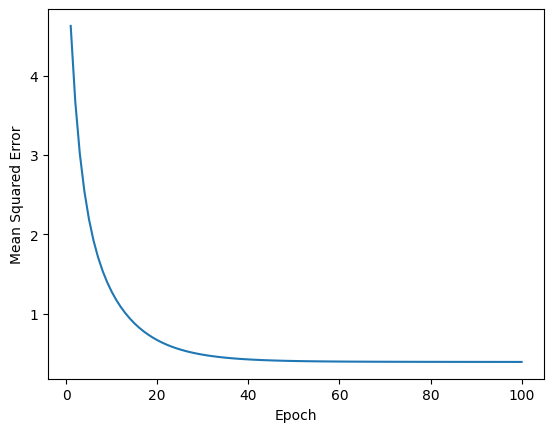

In [211]:
learning_rate = 0.01
alpha = 0.0001
epochs = 100
batch_size = 32
# we will append an array of ones at the end to account for the bias variable w_0 )
X_train_scaled_with_bias =  np.hstack((np.ones((len(X_train_scaled), 1)), X_train_scaled))
weights = model(X_train_scaled_with_bias, y_train_scaled, learning_rate, alpha, epochs, batch_size)

In [212]:
X_test_scaled_with_bias =  np.hstack((np.ones((len(X_test_scaled), 1)), X_test_scaled))
y_pred = np.dot(X_test_scaled_with_bias, weights)


In [213]:
print("scaled predictions \n",y_pred)


scaled predictions 
 [-3.44012555e-01  1.99731582e-01 -7.60468196e-01  3.10413153e-01
 -5.72632243e-01  1.73889249e-01  2.13275022e-01  1.12263634e+00
  2.06980276e-01 -6.63816837e-01 -1.00994207e-01 -1.67394183e+00
  6.63554410e-01 -9.52243080e-02  2.29958345e-01  4.52716412e-01
  6.26225365e-01  1.63042491e-01  5.90210729e-01  1.33189826e-01
  5.18866639e-01 -3.69119590e-01  6.90614710e-01  2.74312992e-01
  5.90210729e-01 -5.07500592e-01 -2.44973689e-01 -5.58117619e-01
  3.63327312e-01  7.90040692e-02 -2.80213790e-01  7.46238175e-01
 -1.30458099e+00  4.38008158e-01  5.01076059e-01 -1.78924761e+00
 -2.59330283e-01 -3.20256225e-01  1.07190413e-01 -4.09248661e-01
  1.01500796e-01 -6.23412147e-01  2.03487907e-01  3.15084437e-01
  1.00279171e+00 -2.69275206e+00  1.25410372e-01  3.17354806e-01
  3.03537471e-01 -1.58005614e-01  9.39748291e-01  6.09883018e-01
  3.10755432e-01  2.24388279e-01  7.09472899e-01 -2.13515285e-01
  2.05970436e-01  3.57094509e-02 -1.73001584e+00 -3.69353453e-01
  4.

In [214]:
y_pred_unscaled = y_pred*y_std + y_mean
print("unscaled predictions \n",y_pred_unscaled)

unscaled predictions 
 [33.5064409  40.94309996 27.81067628 42.45686545 30.37966387 40.58966053
 41.12833036 53.56544852 41.04223862 29.13255391 36.83014497 15.31731501
 47.28669432 36.9090585  41.35650419 44.40311323 46.77615386 40.441312
 46.28359025 40.03302422 45.30783412 33.16305797 47.65679159 41.96313215
 46.28359025 31.27045395 34.86097188 30.57817694 43.1805598  39.29193852
 34.37900142 48.41754047 20.36897517 44.20195194 45.0645166  13.74030524
 34.66462017 33.83135057 39.67743643 32.61422221 39.5996209  29.68515922
 40.99447432 42.52075348 51.92636203  1.38329004 39.92662647 42.55180478
 42.36282839 36.05041353 51.06413224 46.55264347 42.46154671 41.28032373
 47.91471055 35.29122098 41.02842728 38.69980834 14.55040411 33.15985948
 44.27775205 41.58818666 11.67595413 25.7544543  31.62305113 37.1538461
 47.05292061 39.62817345 12.07436457 34.16496482 37.28245805 31.28512481
 25.7544543  24.92259713 51.92066391 31.86303256 44.96399572 43.92518519
 47.12410854 41.34198065 37.956

### d)	[5 pts] Calculate the mean squared error of the prediction.

In [215]:
mse = np.sum((y_pred - y_test_scaled) ** 2) / len(y_test_scaled)
print("Mean squared error on test set:", mse)

Mean squared error on test set: 0.38967672361523054


## Question 2 : Scikit-learn Ridge regression. [20 pts]

In this question, students will use the Scikit-learn Ridge regression model to predict the real estate cost and compare the results found in Question 1. 

## a)	[10 pts] Now import linear regression from Scikit-learn and train the model.



In [216]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model_ridge = Ridge(alpha = 0.0001)
model_ridge.fit(X_train_scaled,y_train_scaled)


Ridge(alpha=0.0001)

## b)	[5 pts] Get the prediction on the test set.

In [217]:
y_pred_ridge = model_ridge.predict(X_test_scaled)


In [218]:
print("scaled predictions ",y_pred_ridge)

scaled predictions  [-0.37929874  0.22136684 -0.7816939   0.30869346 -0.54242423  0.1855165
  0.22656461  1.14442011  0.19971008 -0.64159918 -0.14568136 -1.6758076
  0.59663426 -0.10342101  0.17926202  0.47795156  0.63552199  0.19319743
  0.55599792  0.16110739  0.50978061 -0.35398412  0.72440863  0.26312971
  0.55599792 -0.48502477 -0.2813592  -0.59244055  0.31790796  0.05519452
 -0.28100623  0.72061957 -1.16702381  0.39231787  0.51991278 -1.7936857
 -0.18451175 -0.35107709  0.05596009 -0.43175194  0.10583234 -0.55714012
  0.20080068  0.33258801  1.00773686 -2.64106709  0.1096814   0.29136933
  0.30403792 -0.22400203  0.94975977  0.62674514  0.24319529  0.21247513
  0.72692403 -0.24135154  0.14502479  0.04533796 -1.73185186 -0.3993976
  0.44940035  0.19108576 -1.92846503 -0.96969495 -0.51072455 -0.07355791
  0.59340502  0.08793282 -1.90389554 -0.33578814 -0.0957239  -0.48880234
 -0.96969495 -0.90935248  1.01866494 -0.50125104  0.52249136  0.43443483
  0.61259234  0.23679913 -0.0539424

In [219]:
y_pred_ridge_unscaled = y_pred_ridge*y_std + y_mean
print("unscaled predictions \n",y_pred_ridge_unscaled)

unscaled predictions 
 [33.02384019 41.2390003  27.52037741 42.4333456  30.79281171 40.74868369
 41.31008888 53.86338001 40.9428059  29.4364195  36.21896938 15.29179719
 46.37144331 36.79695421 40.66314264 44.74824828 46.90330152 40.85373397
 45.81566986 40.4148461  45.18356671 33.37006223 48.11898299 41.81018102
 45.81566986 31.5778504  34.36333595 30.10875033 42.5593701  38.96630097
 34.36816342 48.06716091 22.25031204 43.57705677 45.32214191 13.67960659
 35.68789548 33.40982094 38.97677156 32.30645024 39.65886239 30.59154589
 40.95772177 42.76014569 51.99399575  2.09017317 39.71150509 42.19640756
 42.36967296 35.1477963  51.20105681 46.78326269 41.53754272 41.1173904
 48.1533855  34.91051117 40.19488821 38.83149519 14.52529327 32.74895284
 44.3577602  40.82485308 11.8362618  24.94913187 31.22636063 37.2053847
 46.32727787 39.41405489 12.17229286 33.61892431 36.90222573 31.52618556
 24.94913187 25.77442145 52.14345648 31.35592766 45.35740863 44.15308042
 46.5896982  41.45006398 37.47

## c)	[5 pts] Compare the result of your model to that of the Scikit-learn model.


In [220]:
mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
print("Mean squared error on test set using sklearn ridge :", mse_ridge)
print("Mean squared error on test set using created model :", mse)

Mean squared error on test set using sklearn ridge : 0.3885966921513287
Mean squared error on test set using created model : 0.38967672361523054


In [221]:

print("sklearn ridge weights: ",model_ridge.coef_)
print("sklearn ridge bias: ",'{:.30f}'.format(model_ridge.intercept_))
print("model implemented weights: ",weights[1:])
print("model implemented bias: ",weights[0])

sklearn ridge weights:  [ 0.10495455 -0.24995975 -0.40309293  0.18082818  0.25666535 -0.00640627]
sklearn ridge bias:  -0.000000000000004460301475834536
model implemented weights:  [ 0.10845859 -0.25080245 -0.47179288  0.1660164   0.2374649  -0.05642829]
model implemented bias:  0.0007696515722886756


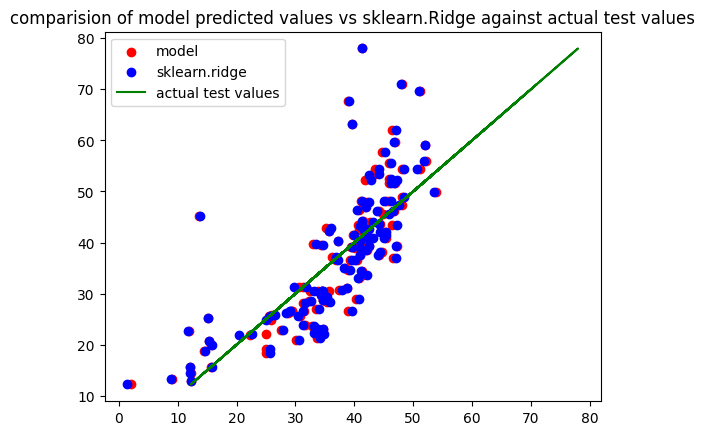

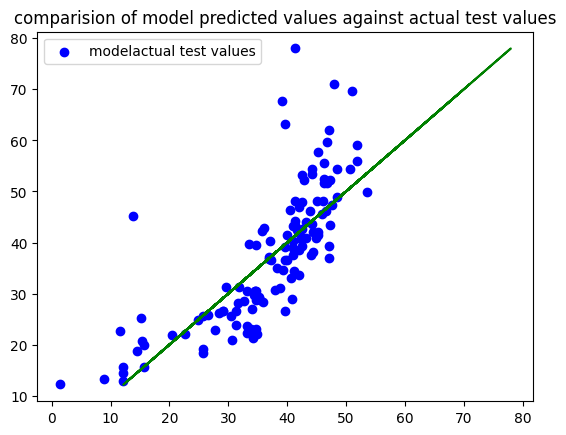

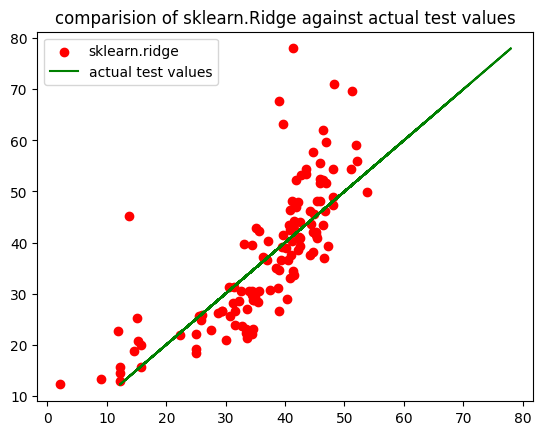

In [222]:
y_test_unscaled = y_test_scaled*y_std + y_mean
np.sort(y_test_unscaled)
np.sort(y_pred_ridge_unscaled)
np.sort(y_pred_unscaled)
fig, ax = plt.subplots()
plt.title("comparision of model predicted values vs sklearn.Ridge against actual test values")
scatter2= ax.scatter(y_pred_ridge_unscaled, y_test_unscaled,color='r')
scatter1 = ax.scatter(y_pred_unscaled, y_test_unscaled,color='b')
line = ax.plot(y_test_unscaled,y_test_unscaled,color='g')
plt.legend(["model" , "sklearn.ridge","actual test values"])
plt.show()

fig, ax = plt.subplots()
plt.title("comparision of model predicted values against actual test values")
scatter1 = ax.scatter(y_pred_unscaled, y_test_unscaled,color='b')
line = ax.plot(y_test_unscaled,y_test_unscaled,color='g')
plt.legend(["model" "actual test values"])
plt.show()

fig, ax = plt.subplots()
plt.title("comparision of sklearn.Ridge against actual test values")
scatter2= ax.scatter(y_pred_ridge_unscaled, y_test_unscaled,color='r')
line = ax.plot(y_test_unscaled,y_test_unscaled,color='g')
plt.legend([ "sklearn.ridge","actual test values"])
plt.show()